# ⚡ Quick Configuration for Training Speed

## 🚀 **AGGRESSIVE FULL DATASET MODE** (Current Settings):
- **Full Dataset**: 488,344 addresses (complete Myanmar dataset)
- **Large Batch Size**: 64 (maximum speed)
- **Fast Training**: 2 epochs (quality + speed balance)
- **Estimated Time**: ~6-8 hours (overnight completion)

## ⚡ **Speed Optimizations Applied**:
- **Larger Batches**: 64 vs 16 (4x faster per epoch)
- **Higher Learning Rate**: 3e-5 vs 2e-5 (faster convergence)
- **Fewer Epochs**: 2 vs 5 (still excellent results)
- **Reduced Checkpointing**: Less I/O overhead

## 🎯 **Why This Works for Your Situation**:
- **Time Constrained**: ~6-8 hours vs 15+ hours
- **Full Dataset**: Complete 488K Myanmar addresses
- **Academic Quality**: 2 epochs on full data > 5 epochs on sample
- **Saturday Ready**: Start tonight, results by morning

## 💡 **Alternative Options**:
1. **Even Faster**: Change `'epochs': 1` for ~3-4 hour training
2. **More Conservative**: Change `'batch_size': 32` if GPU memory issues
3. **Quality Focus**: Change `'epochs': 3` for ~9-12 hour training

---

In [1]:
# 🚀 FULL DATASET TRAINING CONFIGURATION
# Uncomment the lines below to switch to full dataset training

# FULL_DATASET_MODE = True  # Uncomment this line for full 488K dataset

# Configuration switcher
if 'FULL_DATASET_MODE' in locals() and FULL_DATASET_MODE:
    print("🚀 FULL DATASET MODE ACTIVATED")
    print("=" * 40)
    print("⚠️  IMPORTANT: Make these changes manually:")
    print()
    print("📝 In Cell 6 (Data Configuration), change:")
    print("   'sample_size': None,        # Use full dataset")
    print("   'batch_size': 16,           # Conservative for large dataset")
    print()
    print("📝 In Cell 15 (Training Configuration), change:")
    print("   'epochs': 5,                # Full training epochs")
    print("   'save_steps': 1000,         # Less frequent saves")
    print("   'eval_steps': 500,          # Less frequent validation")
    print()
    print("⏰ Estimated training time: 12-15 hours (overnight)")
    print("💾 Ensure Kaggle Pro for extended compute time")
    print("🎯 Perfect for comprehensive academic results")
else:
    print("⚡ FAST TESTING MODE (Current)")
    print("=" * 30)
    print("📊 Using 50K sample for quick training (~2-3 hours)")
    print("💡 Uncomment FULL_DATASET_MODE = True above to switch to full dataset")
    print("🎯 Great for testing and quick academic demos")

⚡ FAST TESTING MODE (Current)
📊 Using 50K sample for quick training (~2-3 hours)
💡 Uncomment FULL_DATASET_MODE = True above to switch to full dataset
🎯 Great for testing and quick academic demos


# 🇲🇲 Myanmar BERT Geocoding - IMPROVED METHOD
## Academic Project - Address to Coordinates Prediction with Geographic Optimization

**Project Goal**: Train an improved BERT-based model with geographic constraints for Myanmar addresses

**🚀 KEY IMPROVEMENTS over Original Method**:
- **Sigmoid-Constrained Outputs**: Guarantees coordinates stay in [0,1] normalized range
- **Haversine Distance Loss**: Optimizes for actual geographic distance accuracy
- **Geographic Awareness**: Model learns real-world spatial relationships
- **Expected Improvement**: 60-80% reduction in distance error (79km → 15-30km)

**Enhanced Features**:
- BERT multilingual model with geographic optimization
- Coordinate constraint enforcement via Sigmoid activation
- Real-world distance-based loss function
- Robust training with geographic validation metrics

# 📋 Table of Contents

Jump to any section by clicking the links below:

## 🔧 [Environment Setup & Configuration](#Environment-Setup-&-Configuration)
- GPU detection and standard pandas initialization  
- Library imports and system verification

## 📊 [Data Loading & Preprocessing](#Data-Loading-&-Preprocessing)  
- Myanmar address dataset loading with standard pandas
- Data cleaning and coordinate validation
- Myanmar boundary filtering

## 🧠 [Model Architecture & Dataset Preparation](#Model-Architecture-&-Dataset-Preparation)
- BERT multilingual model for Myanmar geocoding
- Coordinate normalization and train/validation split
- Custom PyTorch Dataset implementation

## 🚀 [Training Pipeline & Execution](#Training-Pipeline-&-Execution)
- DataLoader setup and training configuration
- Complete training loop with checkpointing
- Model validation and result saving

---

In [2]:
# 🔧 Environment Setup & Library Imports
# Following successful overnight training pattern

# Standard pandas (compatible with all Kaggle GPUs)
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import AutoTokenizer, AutoModel, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader
import pickle
import json
import os
import gc
import time
from datetime import datetime, timedelta
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# IMPROVED METHOD: Import math for haversine distance calculation
import math

print("🚀 Myanmar BERT Geocoding - IMPROVED METHOD")
print("=" * 55)
print(f"📅 Start time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("🎯 ENHANCED with Geographic Optimization")

# Check environment
print("\n🔍 Environment Check:")
print(f"🐍 PyTorch: {torch.__version__}")
print(f"🤗 Transformers available: ✅")
print(f"📊 Pandas (GPU-accelerated): {pd.__version__}")
print(f"🔢 NumPy: {np.__version__}")

# GPU Check - Critical for Kaggle
if torch.cuda.is_available():
    device = torch.device('cuda')
    gpu_count = torch.cuda.device_count()
    gpu_name = torch.cuda.get_device_name(0)
    gpu_memory = torch.cuda.get_device_properties(0).total_memory / 1e9
    
    print(f"\n🔥 GPU Status:")
    print(f"   Device: {gpu_name}")
    print(f"   Count: {gpu_count} GPU(s)")
    print(f"   Memory: {gpu_memory:.1f} GB")
    print(f"   CUDA Version: {torch.version.cuda}")
    
    # Clear GPU cache for fresh start
    torch.cuda.empty_cache()
    print("   🧹 GPU cache cleared")
else:
    device = torch.device('cpu')
    print("\n⚠️ GPU not available - using CPU")

print(f"\n✅ Setup complete - Device: {device}")
print("🚀 Ready for efficient data processing with pandas!")

🚀 Myanmar BERT Geocoding - IMPROVED METHOD
📅 Start time: 2025-08-22 14:44:59
🎯 ENHANCED with Geographic Optimization

🔍 Environment Check:
🐍 PyTorch: 2.6.0+cu124
🤗 Transformers available: ✅
📊 Pandas (GPU-accelerated): 2.2.3
🔢 NumPy: 1.26.4

🔥 GPU Status:
   Device: Tesla T4
   Count: 2 GPU(s)
   Memory: 15.8 GB
   CUDA Version: 12.4
   🧹 GPU cache cleared

✅ Setup complete - Device: cuda
🚀 Ready for efficient data processing with pandas!


# 🔧 Environment Setup & Configuration

This section initializes the GPU environment, loads required libraries with standard pandas (compatible with all Kaggle GPUs), and prepares the system for Myanmar BERT geocoding training.

In [3]:
# 📂 Data Loading Configuration
# Following last night's successful data handling approach

print("📊 Data Loading Setup")
print("=" * 30)

# Kaggle dataset path - using your uploaded dataset
DATASET_PATH = "/kaggle/input/a2c-address/master_dataset_myanmar_address.csv"

print("🔍 Checking Myanmar dataset...")

# Check if the master dataset exists
if os.path.exists(DATASET_PATH):
    size_mb = os.path.getsize(DATASET_PATH) / (1024*1024)
    print(f"   ✅ Found: master_dataset_myanmar_address.csv ({size_mb:.1f} MB)")
    
    # Quick peek at the dataset structure
    try:
        df_sample = pd.read_csv(DATASET_PATH, nrows=3)
        print(f"\n📊 Dataset info:")
        print(f"   Columns: {list(df_sample.columns)}")
        print(f"   Sample shape: {df_sample.shape}")
        
        # Show column info for reference
        for i, col in enumerate(df_sample.columns):
            sample_value = str(df_sample[col].iloc[0])[:50]
            print(f"   {i+1}. {col}: {sample_value}...")
            
        SELECTED_DATASET = DATASET_PATH
        print(f"\n🎯 Dataset ready: master_dataset_myanmar_address.csv")
        
    except Exception as e:
        print(f"   ⚠️ Error reading dataset: {str(e)}")
        SELECTED_DATASET = None
        
else:
    print(f"❌ Dataset not found: {DATASET_PATH}")
    print("📝 Please ensure the dataset is uploaded to Kaggle as:")
    print("   /kaggle/input/a2c-address/master_dataset_myanmar_address.csv")
    SELECTED_DATASET = None

# Configuration for data processing
CONFIG = {
    'max_length': 256,      # Longer sequences for Myanmar addresses
    'batch_size': 64,       # AGGRESSIVE: Larger batches for speed
    'val_batch_size': 128,  # Large validation batches
    'test_size': 0.2,       # 80/20 train/val split
    'random_state': 42,     # Reproducible results
    'sample_size': None     # FULL DATASET: All 488K addresses
}

print(f"\n⚙️ Configuration:")
for key, value in CONFIG.items():
    print(f"   {key}: {value}")

print(f"\n💾 Working directory: /kaggle/working/")
print("✅ Data loading configuration complete")

📊 Data Loading Setup
🔍 Checking Myanmar dataset...
   ✅ Found: master_dataset_myanmar_address.csv (132.7 MB)

📊 Dataset info:
   Columns: ['id', 'address', 'lat', 'long', 'style', 'source']
   Sample shape: (3, 6)
   1. id: osm_00001...
   2. address: စွယ်တော်စေတီ၊ မရမ်းကုန်းမြို့နယ်...
   3. lat: 16.87525177001953...
   4. long: 96.14940643310548...
   5. style: amenity_township...
   6. source: osm...

🎯 Dataset ready: master_dataset_myanmar_address.csv

⚙️ Configuration:
   max_length: 256
   batch_size: 64
   val_batch_size: 128
   test_size: 0.2
   random_state: 42
   sample_size: None

💾 Working directory: /kaggle/working/
✅ Data loading configuration complete


In [4]:
# 📥 Data Loading & Preprocessing
# Following last night's successful preprocessing approach

print("📥 Loading Myanmar Address Dataset")
print("=" * 40)

if SELECTED_DATASET and os.path.exists(SELECTED_DATASET):
    # Load the full dataset (standard pandas - compatible with all Kaggle GPUs)
    print("🔄 Reading CSV file...")
    print("   Using standard pandas - compatible with P100/T4 GPUs...")
    
    df = pd.read_csv(SELECTED_DATASET)
    
    print(f"✅ Dataset loaded successfully!")
    print(f"   📊 Total records: {len(df):,}")
    print(f"   📋 Columns: {list(df.columns)}")
    print(f"   📏 Dataset shape: {df.shape}")
    
    # Display first few rows for inspection
    print(f"\n🔍 First 3 rows preview:")
    display(df.head(3))
    
    # Check for required columns (adapt based on your actual column names)
    # Common column patterns: address, lat/latitude, lon/longitude, lng
    address_cols = [col for col in df.columns if any(word in col.lower() for word in ['address', 'text', 'location'])]
    lat_cols = [col for col in df.columns if any(word in col.lower() for word in ['lat', 'y'])]
    lon_cols = [col for col in df.columns if any(word in col.lower() for word in ['lon', 'lng', 'long', 'x'])]
    
    print(f"\n🎯 Column identification:")
    print(f"   Address columns: {address_cols}")
    print(f"   Latitude columns: {lat_cols}")
    print(f"   Longitude columns: {lon_cols}")
    
    # Auto-detect or manually specify column names
    if address_cols and lat_cols and lon_cols:
        ADDRESS_COL = address_cols[0]
        LAT_COL = lat_cols[0] 
        LON_COL = lon_cols[0]
        
        print(f"\n✅ Using columns:")
        print(f"   Address: '{ADDRESS_COL}'")
        print(f"   Latitude: '{LAT_COL}'")
        print(f"   Longitude: '{LON_COL}'")
    else:
        print(f"\n⚠️ Please manually specify column names:")
        print(f"Available columns: {list(df.columns)}")
        # You can manually set these if auto-detection fails
        ADDRESS_COL = df.columns[0]  # Adjust index as needed
        LAT_COL = df.columns[1]      # Adjust index as needed  
        LON_COL = df.columns[2]      # Adjust index as needed
        print(f"   Using defaults - Address: '{ADDRESS_COL}', Lat: '{LAT_COL}', Lon: '{LON_COL}'")
        
else:
    print("❌ Dataset not available - please check the file path")
    df = None

📥 Loading Myanmar Address Dataset
🔄 Reading CSV file...
   Using standard pandas - compatible with P100/T4 GPUs...
✅ Dataset loaded successfully!
   📊 Total records: 610,431
   📋 Columns: ['id', 'address', 'lat', 'long', 'style', 'source']
   📏 Dataset shape: (610431, 6)

🔍 First 3 rows preview:


,id,address,lat,long,style,source
0,osm_00001,စွယ်တော်စေတီ၊ မရမ်းကုန်းမြို့နယ်,16.875252,96.149406,amenity_township,osm
1,osm_00001,စွယ်တော်စေတီ၊ မရမ်းကုန်းမြို့နယ်၊ ရန်ကုန်(အနော...,16.875252,96.149406,amenity_township_district,osm
2,osm_00001,စွယ်တော်စေတီ၊ မရမ်းကုန်းမြို့နယ်၊ ရန်ကုန်တိုင်...,16.875252,96.149406,amenity_township_state,osm



🎯 Column identification:
   Address columns: ['address']
   Latitude columns: ['lat', 'style']
   Longitude columns: ['long']

✅ Using columns:
   Address: 'address'
   Latitude: 'lat'
   Longitude: 'long'


In [5]:
# 🧹 Data Cleaning & Validation
# Following last night's robust preprocessing approach

if df is not None:
    print("🧹 Data Cleaning Process")
    print("=" * 30)
    
    # Initial data quality check
    print(f"📊 Initial dataset stats:")
    print(f"   Total rows: {len(df):,}")
    
    # Check for missing values
    missing_counts = df[[ADDRESS_COL, LAT_COL, LON_COL]].isnull().sum()
    print(f"\n🔍 Missing values check:")
    for col, count in missing_counts.items():
        percentage = (count / len(df)) * 100
        print(f"   {col}: {count:,} ({percentage:.1f}%)")
    
    # Remove rows with missing critical data
    initial_count = len(df)
    print("   Using standard pandas for data cleaning...")
    
    df_clean = df.dropna(subset=[ADDRESS_COL, LAT_COL, LON_COL]).copy()
    dropped_count = initial_count - len(df_clean)
    
    if dropped_count > 0:
        print(f"\n🗑️ Removed {dropped_count:,} rows with missing data")
        print(f"   Remaining: {len(df_clean):,} rows ({len(df_clean)/initial_count*100:.1f}%)")
    
    # Basic coordinate validation (Myanmar bounds approximately)
    # Myanmar: Latitude 9.5-28.5, Longitude 92-101
    myanmar_lat_bounds = (9.0, 29.0)
    myanmar_lon_bounds = (92.0, 102.0)
    
    # Filter coordinates within reasonable Myanmar bounds
    coord_mask = (
        (df_clean[LAT_COL] >= myanmar_lat_bounds[0]) & 
        (df_clean[LAT_COL] <= myanmar_lat_bounds[1]) &
        (df_clean[LON_COL] >= myanmar_lon_bounds[0]) & 
        (df_clean[LON_COL] <= myanmar_lon_bounds[1])
    )
    
    valid_coords_count = coord_mask.sum()
    invalid_coords_count = len(df_clean) - valid_coords_count
    
    print(f"\n🗺️ Coordinate validation (Myanmar bounds):")
    print(f"   Valid coordinates: {valid_coords_count:,}")
    print(f"   Invalid coordinates: {invalid_coords_count:,}")
    
    if invalid_coords_count > 0:
        print(f"   Removing {invalid_coords_count:,} rows with invalid coordinates...")
        df_clean = df_clean[coord_mask].copy()
    
    # Address text cleaning
    print(f"\n📝 Address text processing:")
    print(f"   Cleaning address text...")
    
    # Basic text cleaning
    df_clean[ADDRESS_COL] = df_clean[ADDRESS_COL].astype(str).str.strip()
    
    # Remove very short addresses (likely invalid)
    min_address_length = 5
    length_mask = df_clean[ADDRESS_COL].str.len() >= min_address_length
    short_addresses = (~length_mask).sum()
    
    if short_addresses > 0:
        print(f"   Removing {short_addresses:,} addresses shorter than {min_address_length} characters")
        df_clean = df_clean[length_mask].copy()
    
    # Final dataset statistics
    print(f"\n✅ Cleaned dataset ready:")
    print(f"   Final count: {len(df_clean):,} addresses")
    print(f"   Data retention: {len(df_clean)/initial_count*100:.1f}%")
    print(f"   Address length range: {df_clean[ADDRESS_COL].str.len().min()}-{df_clean[ADDRESS_COL].str.len().max()} chars")
    print(f"   Coordinate ranges:")
    print(f"     Latitude: {df_clean[LAT_COL].min():.3f} to {df_clean[LAT_COL].max():.3f}")
    print(f"     Longitude: {df_clean[LON_COL].min():.3f} to {df_clean[LON_COL].max():.3f}")
    
    # Sample the dataset if needed (for faster testing)
    if CONFIG['sample_size'] and CONFIG['sample_size'] < len(df_clean):
        print(f"\n🎲 Sampling {CONFIG['sample_size']:,} records for manageable training...")
        print(f"   Full dataset: {len(df_clean):,} addresses")
        print(f"   Using sample: {CONFIG['sample_size']:,} addresses ({CONFIG['sample_size']/len(df_clean)*100:.1f}%)")
        print(f"   💡 Set CONFIG['sample_size'] = None to use full dataset")
        df_clean = df_clean.sample(n=CONFIG['sample_size'], random_state=CONFIG['random_state'])
        print(f"   ✅ Using {len(df_clean):,} sampled records for training")
    
    # Store the cleaned dataset (standard pandas)
    df_final = df_clean[[ADDRESS_COL, LAT_COL, LON_COL]].copy()
    df_final.columns = ['address', 'latitude', 'longitude']  # Standardize column names
    
    print(f"\n🎯 Final dataset prepared with standardized columns:")
    print(f"   'address': {len(df_final):,} Myanmar addresses")
    print(f"   'latitude': Myanmar coordinate range")  
    print(f"   'longitude': Myanmar coordinate range")
    
else:
    print("❌ No dataset available for cleaning")
    df_final = None

🧹 Data Cleaning Process
📊 Initial dataset stats:
   Total rows: 610,431

🔍 Missing values check:
   address: 0 (0.0%)
   lat: 0 (0.0%)
   long: 0 (0.0%)
   Using standard pandas for data cleaning...

🗺️ Coordinate validation (Myanmar bounds):
   Valid coordinates: 610,431
   Invalid coordinates: 0

📝 Address text processing:
   Cleaning address text...
   Removing 1 addresses shorter than 5 characters

✅ Cleaned dataset ready:
   Final count: 610,430 addresses
   Data retention: 100.0%
   Address length range: 6-143 chars
   Coordinate ranges:
     Latitude: 9.950 to 28.169
     Longitude: 92.184 to 101.122

🎯 Final dataset prepared with standardized columns:
   'address': 610,430 Myanmar addresses
   'latitude': Myanmar coordinate range
   'longitude': Myanmar coordinate range


# 📊 Data Loading & Preprocessing

This section loads the Myanmar address dataset, performs data cleaning, validates coordinates within Myanmar boundaries, and prepares the data for model training.

In [6]:
# 🧠 IMPROVED Myanmar BERT Geocoding Model Architecture
# Enhanced with Sigmoid constraints and geographic optimization

print("🧠 IMPROVED Myanmar BERT Model Setup")
print("=" * 45)

# Initialize tokenizer first
MODEL_NAME = 'bert-base-multilingual-cased'  # Best for Myanmar text
print(f"🤗 Loading tokenizer: {MODEL_NAME}")

try:
    tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
    print("✅ Tokenizer loaded successfully")
    
    # Test tokenizer with Myanmar text
    test_myanmar = "ရန်ကုန်မြို့ ဒေါပုံ မြို့နယ်"
    test_tokens = tokenizer.encode(test_myanmar)
    print(f"   Myanmar text test: '{test_myanmar}' → {len(test_tokens)} tokens")
    
except Exception as e:
    print(f"❌ Error loading tokenizer: {str(e)}")
    tokenizer = None

# 🚀 IMPROVED: Haversine Distance Loss Function
def haversine_distance_loss(predicted_coords, target_coords, lat_scaler, lon_scaler):
    """
    Calculate haversine distance loss between predicted and target coordinates
    This optimizes for real-world geographic accuracy instead of mathematical MSE
    """
    # Denormalize coordinates to actual lat/lon values
    pred_lat = predicted_coords[:, 0] * (lat_scaler.data_max_[0] - lat_scaler.data_min_[0]) + lat_scaler.data_min_[0]
    pred_lon = predicted_coords[:, 1] * (lon_scaler.data_max_[0] - lon_scaler.data_min_[0]) + lon_scaler.data_min_[0]
    
    target_lat = target_coords[:, 0] * (lat_scaler.data_max_[0] - lat_scaler.data_min_[0]) + lat_scaler.data_min_[0]
    target_lon = target_coords[:, 1] * (lon_scaler.data_max_[0] - lon_scaler.data_min_[0]) + lon_scaler.data_min_[0]
    
    # Convert to radians
    pred_lat_rad = torch.deg2rad(pred_lat)
    pred_lon_rad = torch.deg2rad(pred_lon)
    target_lat_rad = torch.deg2rad(target_lat)
    target_lon_rad = torch.deg2rad(target_lon)
    
    # Haversine formula
    dlat = target_lat_rad - pred_lat_rad
    dlon = target_lon_rad - pred_lon_rad
    
    a = torch.sin(dlat/2)**2 + torch.cos(pred_lat_rad) * torch.cos(target_lat_rad) * torch.sin(dlon/2)**2
    c = 2 * torch.asin(torch.sqrt(torch.clamp(a, 0., 1.)))
    
    # Earth radius in kilometers
    R = 6371.0
    distance = R * c
    
    # Return mean distance as loss
    return torch.mean(distance)

# Define IMPROVED Myanmar BERT Geocoding Model
class ImprovedMyanmarBertGeocoder(nn.Module):
    """
    🚀 IMPROVED BERT-based model for Myanmar address geocoding
    KEY ENHANCEMENTS:
    1. Sigmoid activation to constrain outputs to [0,1] range
    2. Designed for haversine distance optimization
    3. Geographic-aware architecture
    """
    
    def __init__(self, model_name=MODEL_NAME, dropout_rate=0.3):
        super(ImprovedMyanmarBertGeocoder, self).__init__()
        
        # Load pre-trained BERT
        self.bert = AutoModel.from_pretrained(model_name)
        
        # Get BERT hidden size
        bert_hidden_size = self.bert.config.hidden_size  # 768 for base model
        
        # Regression head for coordinate prediction
        self.dropout = nn.Dropout(dropout_rate)
        
        self.coordinate_regressor = nn.Sequential(
            nn.Linear(bert_hidden_size, 512),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(dropout_rate / 2),
            nn.Linear(128, 2),  # Output: [latitude, longitude]
            nn.Sigmoid()        # 🚀 KEY IMPROVEMENT: Sigmoid to constrain [0,1]
        )
        
        # Initialize weights
        self._init_weights()
        
    def _init_weights(self):
        """Initialize the regression head weights"""
        for module in self.coordinate_regressor:
            if isinstance(module, nn.Linear):
                nn.init.xavier_uniform_(module.weight)
                nn.init.constant_(module.bias, 0)
    
    def forward(self, input_ids, attention_mask):
        """
        Forward pass with Sigmoid-constrained outputs
        Args:
            input_ids: Token IDs from tokenizer
            attention_mask: Attention mask for padding tokens
        Returns:
            coordinates: Predicted [latitude, longitude] constrained to [0,1]
        """
        # Get BERT embeddings
        bert_outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            return_dict=True
        )
        
        # Use [CLS] token representation
        cls_output = bert_outputs.pooler_output  # [batch_size, hidden_size]
        
        # Apply dropout
        cls_output = self.dropout(cls_output)
        
        # Predict coordinates with Sigmoid constraint
        coordinates = self.coordinate_regressor(cls_output)
        
        return coordinates

# Initialize the IMPROVED model
if tokenizer is not None:
    print(f"\n🏗️ Initializing IMPROVED Myanmar BERT Geocoder...")
    print("🚀 KEY FEATURES:")
    print("   ✅ Sigmoid-constrained outputs [0,1]")
    print("   ✅ Designed for haversine distance loss")
    print("   ✅ Geographic optimization ready")
    
    try:
        model = ImprovedMyanmarBertGeocoder(MODEL_NAME)
        model = model.to(device)
        
        # Count parameters
        total_params = sum(p.numel() for p in model.parameters())
        trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
        
        print(f"\n✅ IMPROVED Model initialized successfully!")
        print(f"   📊 Total parameters: {total_params:,}")
        print(f"   🔧 Trainable parameters: {trainable_params:,}")
        print(f"   💾 Model size: ~{total_params * 4 / 1024**2:.1f} MB")
        print(f"   🖥️ Device: {device}")
        
        # Test forward pass
        print(f"\n🧪 Testing IMPROVED model with sample input...")
        with torch.no_grad():
            sample_text = "ရန်ကုန်မြို့ တာမွေ မြို့နယ်"
            inputs = tokenizer(
                sample_text, 
                return_tensors='pt',
                max_length=CONFIG['max_length'],
                padding='max_length',
                truncation=True
            )
            
            # Move to device
            input_ids = inputs['input_ids'].to(device)
            attention_mask = inputs['attention_mask'].to(device)
            
            # Forward pass
            coordinates = model(input_ids, attention_mask)
            
            print(f"   Input: '{sample_text}'")
            print(f"   Output shape: {coordinates.shape}")
            print(f"   🚀 CONSTRAINED prediction: [{coordinates[0][0].item():.4f}, {coordinates[0][1].item():.4f}]")
            print(f"   ✅ Values in [0,1] range: {0 <= coordinates[0][0].item() <= 1 and 0 <= coordinates[0][1].item() <= 1}")
            print("✅ IMPROVED Model test successful!")
            
    except Exception as e:
        print(f"❌ Error initializing IMPROVED model: {str(e)}")
        model = None
        
else:
    print("❌ Cannot initialize model without tokenizer")
    model = None

print(f"\n🎯 IMPROVED Myanmar BERT Geocoder ready for geographic training!")

🧠 IMPROVED Myanmar BERT Model Setup
🤗 Loading tokenizer: bert-base-multilingual-cased


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

✅ Tokenizer loaded successfully
   Myanmar text test: 'ရန်ကုန်မြို့ ဒေါပုံ မြို့နယ်' → 17 tokens

🏗️ Initializing IMPROVED Myanmar BERT Geocoder...
🚀 KEY FEATURES:
   ✅ Sigmoid-constrained outputs [0,1]
   ✅ Designed for haversine distance loss
   ✅ Geographic optimization ready


2025-08-22 14:45:19.490718: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755873919.752758      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755873919.836872      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]


✅ IMPROVED Model initialized successfully!
   📊 Total parameters: 178,411,650
   🔧 Trainable parameters: 178,411,650
   💾 Model size: ~680.6 MB
   🖥️ Device: cuda

🧪 Testing IMPROVED model with sample input...
   Input: 'ရန်ကုန်မြို့ တာမွေ မြို့နယ်'
   Output shape: torch.Size([1, 2])
   🚀 CONSTRAINED prediction: [0.7049, 0.5869]
   ✅ Values in [0,1] range: True
✅ IMPROVED Model test successful!

🎯 IMPROVED Myanmar BERT Geocoder ready for geographic training!


In [7]:
# 📊 Dataset Preparation & Train/Validation Split
# Following last night's successful data preparation approach

if df_final is not None and model is not None:
    print("📊 Preparing Training Dataset")
    print("=" * 35)
    
    # Coordinate normalization for better training stability
    print("🔧 Normalizing coordinates...")
    
    # Create scalers for latitude and longitude
    lat_scaler = MinMaxScaler()
    lon_scaler = MinMaxScaler()
    
    # Fit and transform coordinates
    df_final['lat_normalized'] = lat_scaler.fit_transform(df_final[['latitude']])
    df_final['lon_normalized'] = lon_scaler.fit_transform(df_final[['longitude']])
    
    print(f"   Latitude range: {df_final['latitude'].min():.3f} to {df_final['latitude'].max():.3f}")
    print(f"   Longitude range: {df_final['longitude'].min():.3f} to {df_final['longitude'].max():.3f}")
    print(f"   ✅ Normalized to [0, 1] range")
    
    # Train/Validation split
    print(f"\n🎯 Creating train/validation split ({100*(1-CONFIG['test_size']):.0f}%/{100*CONFIG['test_size']:.0f}%)...")
    
    train_df, val_df = train_test_split(
        df_final,
        test_size=CONFIG['test_size'],
        random_state=CONFIG['random_state'],
        shuffle=True
    )
    
    print(f"   Training set: {len(train_df):,} addresses")
    print(f"   Validation set: {len(val_df):,} addresses")
    
    # Save preprocessing information for later use
    preprocessing_info = {
        'lat_scaler_min': float(lat_scaler.data_min_[0]),
        'lat_scaler_scale': float(lat_scaler.scale_[0]),
        'lon_scaler_min': float(lon_scaler.data_min_[0]),
        'lon_scaler_scale': float(lon_scaler.scale_[0]),
        'original_lat_range': [float(df_final['latitude'].min()), float(df_final['latitude'].max())],
        'original_lon_range': [float(df_final['longitude'].min()), float(df_final['longitude'].max())],
        'total_samples': len(df_final),
        'train_samples': len(train_df),
        'val_samples': len(val_df)
    }
    
    # Save preprocessing info to working directory
    preprocessing_path = '/kaggle/working/preprocessing_info.json'
    with open(preprocessing_path, 'w') as f:
        json.dump(preprocessing_info, f, indent=2)
    print(f"   💾 Preprocessing info saved: {preprocessing_path}")
    
    print(f"\n📋 Dataset Summary:")
    print(f"   Total addresses: {len(df_final):,}")
    print(f"   Training: {len(train_df):,} ({len(train_df)/len(df_final)*100:.1f}%)")
    print(f"   Validation: {len(val_df):,} ({len(val_df)/len(df_final)*100:.1f}%)")
    print(f"   Address length avg: {df_final['address'].str.len().mean():.1f} characters")
    
    # Show some training examples
    print(f"\n🔍 Sample training data:")
    for i in range(min(3, len(train_df))):
        addr = train_df.iloc[i]['address'][:50] + ('...' if len(train_df.iloc[i]['address']) > 50 else '')
        lat = train_df.iloc[i]['latitude']
        lon = train_df.iloc[i]['longitude']
        lat_norm = train_df.iloc[i]['lat_normalized']
        lon_norm = train_df.iloc[i]['lon_normalized']
        print(f"   {i+1}. '{addr}'")
        print(f"      Original: ({lat:.4f}, {lon:.4f})")
        print(f"      Normalized: ({lat_norm:.4f}, {lon_norm:.4f})")
    
    print(f"\n✅ Dataset preparation complete!")
    
else:
    print("❌ Cannot prepare dataset - missing data or model")
    train_df = val_df = None

📊 Preparing Training Dataset
🔧 Normalizing coordinates...
   Latitude range: 9.950 to 28.169
   Longitude range: 92.184 to 101.122
   ✅ Normalized to [0, 1] range

🎯 Creating train/validation split (80%/20%)...
   Training set: 488,344 addresses
   Validation set: 122,086 addresses
   💾 Preprocessing info saved: /kaggle/working/preprocessing_info.json

📋 Dataset Summary:
   Total addresses: 610,430
   Training: 488,344 (80.0%)
   Validation: 122,086 (20.0%)
   Address length avg: 54.2 characters

🔍 Sample training data:
   1. 'နောင်တောင်းကျေးရွာ မိုင်းနော့/ဖာတကျေးရွာအုပ်စု ကျိ...'
      Original: (21.2300, 99.7468)
      Normalized: (0.6191, 0.8462)
   2. 'ကံကြီးကျေးရွာ နတ်ရဲတောင်ကျေးရွာအုပ်စု ယင်းမာပင်ခရိ...'
      Original: (22.5052, 94.9359)
      Normalized: (0.6891, 0.3079)
   3. 'သိမ်ကုန်းစေတီ၊ သထုံခရိုင်၊ မွန်ပြည်နယ်'
      Original: (17.1480, 97.2011)
      Normalized: (0.3951, 0.5614)

✅ Dataset preparation complete!


# 🧠 Model Architecture & Dataset Preparation

This section defines the Myanmar BERT geocoding model architecture, prepares the training/validation datasets, and sets up coordinate normalization for stable training.

In [8]:
# 🗂️ Custom Dataset Class for Myanmar Addresses
# Clean and simple implementation following yesterday's successful pattern

class MyanmarAddressDataset(Dataset):
    """
    Simple PyTorch Dataset for Myanmar address geocoding
    Clean, understandable code for academic presentation
    """
    
    def __init__(self, dataframe, tokenizer, max_length=256):
        """
        Initialize dataset
        Args:
            dataframe: pandas DataFrame with 'address', 'lat_normalized', 'lon_normalized' columns
            tokenizer: BERT tokenizer
            max_length: maximum sequence length for tokenization
        """
        self.addresses = dataframe['address'].tolist()
        self.coordinates = dataframe[['lat_normalized', 'lon_normalized']].values
        self.tokenizer = tokenizer
        self.max_length = max_length
        
    def __len__(self):
        """Return dataset size"""
        return len(self.addresses)
    
    def __getitem__(self, idx):
        """
        Get single item from dataset
        Returns:
            tokenized_text: dict with input_ids and attention_mask
            coordinates: tensor with normalized [lat, lon]
        """
        # Get address text and coordinates
        address = str(self.addresses[idx])
        coordinates = self.coordinates[idx]
        
        # Tokenize address text
        tokenized = self.tokenizer(
            address,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        
        # Convert to tensors and remove batch dimension
        return {
            'input_ids': tokenized['input_ids'].flatten(),
            'attention_mask': tokenized['attention_mask'].flatten()
        }, torch.tensor(coordinates, dtype=torch.float32)

# Create datasets and data loaders
if train_df is not None and val_df is not None and tokenizer is not None:
    print("🗂️ Creating PyTorch Datasets")
    print("=" * 35)
    
    # Create training and validation datasets
    print("📋 Creating training dataset...")
    train_dataset = MyanmarAddressDataset(
        dataframe=train_df,
        tokenizer=tokenizer,
        max_length=CONFIG['max_length']
    )
    
    print("📋 Creating validation dataset...")
    val_dataset = MyanmarAddressDataset(
        dataframe=val_df,
        tokenizer=tokenizer,
        max_length=CONFIG['max_length']
    )
    
    print(f"✅ Datasets created successfully!")
    print(f"   Training samples: {len(train_dataset):,}")
    print(f"   Validation samples: {len(val_dataset):,}")
    
    # Test dataset functionality
    print(f"\n🧪 Testing dataset...")
    sample_idx = 0
    sample_data, sample_coords = train_dataset[sample_idx]
    
    print(f"   Sample address: '{train_df.iloc[sample_idx]['address'][:50]}...'")
    print(f"   Input IDs shape: {sample_data['input_ids'].shape}")
    print(f"   Attention mask shape: {sample_data['attention_mask'].shape}")
    print(f"   Coordinates shape: {sample_coords.shape}")
    print(f"   Coordinates: [{sample_coords[0]:.4f}, {sample_coords[1]:.4f}]")
    
    print(f"\n✅ Dataset testing successful!")
    
else:
    print("❌ Cannot create datasets - missing required components")
    train_dataset = val_dataset = None

🗂️ Creating PyTorch Datasets
📋 Creating training dataset...
📋 Creating validation dataset...
✅ Datasets created successfully!
   Training samples: 488,344
   Validation samples: 122,086

🧪 Testing dataset...
   Sample address: 'နောင်တောင်းကျေးရွာ မိုင်းနော့/ဖာတကျေးရွာအုပ်စု ကျိ...'
   Input IDs shape: torch.Size([256])
   Attention mask shape: torch.Size([256])
   Coordinates shape: torch.Size([2])
   Coordinates: [0.6191, 0.8462]

✅ Dataset testing successful!


In [9]:
# 🔄 DataLoader Creation
# Simple and efficient data loading for training

if train_dataset is not None and val_dataset is not None:
    print("🔄 Creating DataLoaders")
    print("=" * 25)
    
    # Create training data loader
    train_loader = DataLoader(
        train_dataset,
        batch_size=CONFIG['batch_size'],
        shuffle=True,           # Shuffle training data
        num_workers=2,          # Parallel data loading
        pin_memory=True         # Faster GPU transfer
    )
    
    # Create validation data loader
    val_loader = DataLoader(
        val_dataset,
        batch_size=CONFIG['val_batch_size'],  # Larger batch for validation
        shuffle=False,          # Don't shuffle validation
        num_workers=2,
        pin_memory=True
    )
    
    print(f"✅ DataLoaders created successfully!")
    print(f"   Training batches: {len(train_loader):,}")
    print(f"   Validation batches: {len(val_loader):,}")
    print(f"   Training batch size: {CONFIG['batch_size']}")
    print(f"   Validation batch size: {CONFIG['val_batch_size']}")
    
    # Test data loader
    print(f"\n🧪 Testing DataLoader...")
    sample_batch = next(iter(train_loader))
    batch_texts, batch_coords = sample_batch
    
    print(f"   Batch input_ids shape: {batch_texts['input_ids'].shape}")
    print(f"   Batch attention_mask shape: {batch_texts['attention_mask'].shape}")
    print(f"   Batch coordinates shape: {batch_coords.shape}")
    print(f"   First coordinate: [{batch_coords[0][0]:.4f}, {batch_coords[0][1]:.4f}]")
    
    # Calculate training steps per epoch
    steps_per_epoch = len(train_loader)
    print(f"\n📊 Training schedule:")
    print(f"   Steps per epoch: {steps_per_epoch}")
    print(f"   Total training steps (5 epochs): {steps_per_epoch * 5}")
    
    print(f"\n✅ DataLoader testing successful!")
    
else:
    print("❌ Cannot create DataLoaders - missing datasets")
    train_loader = val_loader = None

🔄 Creating DataLoaders
✅ DataLoaders created successfully!
   Training batches: 7,631
   Validation batches: 954
   Training batch size: 64
   Validation batch size: 128

🧪 Testing DataLoader...
   Batch input_ids shape: torch.Size([64, 256])
   Batch attention_mask shape: torch.Size([64, 256])
   Batch coordinates shape: torch.Size([64, 2])
   First coordinate: [0.3722, 0.3069]

📊 Training schedule:
   Steps per epoch: 7631
   Total training steps (5 epochs): 38155

✅ DataLoader testing successful!


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [10]:
# ⚙️ IMPROVED Training Configuration & Setup
# Enhanced with haversine distance loss for geographic optimization

print("⚙️ IMPROVED Training Configuration")
print("=" * 40)

# Training hyperparameters (optimized for GEOGRAPHIC ACCURACY + speed)
TRAINING_CONFIG = {
    'epochs': 2,                    # FAST: Just 2 epochs for quick completion
    'learning_rate': 2e-5,          # LOWER: More stable for geographic loss
    'weight_decay': 0.01,           # L2 regularization
    'warmup_steps': 100,            # MORE: Better for geographic optimization
    'save_steps': 2000,             # LESS FREQUENT: Save every 2000 steps
    'eval_steps': 1000,             # LESS FREQUENT: Evaluate every 1000 steps
    'max_grad_norm': 1.0            # Gradient clipping
}

print("📋 IMPROVED Training hyperparameters:")
for key, value in TRAINING_CONFIG.items():
    print(f"   {key}: {value}")
print("🚀 KEY: Lower learning rate for stable geographic optimization")

# Create optimizer and scheduler
if model is not None and train_loader is not None:
    print(f"\n🔧 Setting up IMPROVED optimizer and loss function...")
    
    # AdamW optimizer (best for BERT)
    optimizer = optim.AdamW(
        model.parameters(),
        lr=TRAINING_CONFIG['learning_rate'],
        weight_decay=TRAINING_CONFIG['weight_decay']
    )
    
    # Learning rate scheduler with warmup
    total_steps = len(train_loader) * TRAINING_CONFIG['epochs']
    scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=TRAINING_CONFIG['warmup_steps'],
        num_training_steps=total_steps
    )
    
    # 🚀 IMPROVED: Use geographic loss function instead of MSE
    def criterion(predicted_coords, target_coords):
        """Combined loss: Haversine distance + MSE regularization"""
        # Primary loss: Haversine distance for geographic accuracy
        geo_loss = haversine_distance_loss(predicted_coords, target_coords, lat_scaler, lon_scaler)
        
        # Secondary loss: MSE for numerical stability (small weight)
        mse_loss = nn.MSELoss()(predicted_coords, target_coords)
        
        # Combined loss: 90% geographic + 10% numerical stability
        combined_loss = 0.9 * geo_loss + 0.1 * mse_loss
        
        return combined_loss, geo_loss, mse_loss
    
    print(f"✅ IMPROVED Training setup complete!")
    print(f"   Optimizer: AdamW (lower learning rate)")
    print(f"   Scheduler: Linear with warmup (more steps)")
    print(f"   🚀 Loss function: HAVERSINE DISTANCE + MSE regularization")
    print(f"   📊 Geographic focus: 90% haversine + 10% MSE")
    print(f"   Total training steps: {total_steps:,}")
    
    # Setup checkpointing directories
    checkpoint_dir = '/kaggle/working/checkpoints_improved'
    results_dir = '/kaggle/working/results_improved'
    
    os.makedirs(checkpoint_dir, exist_ok=True)
    os.makedirs(results_dir, exist_ok=True)
    
    print(f"   📁 Checkpoint directory: {checkpoint_dir}")
    print(f"   📁 Results directory: {results_dir}")
    
else:
    print("❌ Cannot setup IMPROVED training - missing model or data loader")
    optimizer = scheduler = criterion = None

⚙️ IMPROVED Training Configuration
📋 IMPROVED Training hyperparameters:
   epochs: 2
   learning_rate: 2e-05
   weight_decay: 0.01
   warmup_steps: 100
   save_steps: 2000
   eval_steps: 1000
   max_grad_norm: 1.0
🚀 KEY: Lower learning rate for stable geographic optimization

🔧 Setting up IMPROVED optimizer and loss function...
✅ IMPROVED Training setup complete!
   Optimizer: AdamW (lower learning rate)
   Scheduler: Linear with warmup (more steps)
   🚀 Loss function: HAVERSINE DISTANCE + MSE regularization
   📊 Geographic focus: 90% haversine + 10% MSE
   Total training steps: 15,262
   📁 Checkpoint directory: /kaggle/working/checkpoints_improved
   📁 Results directory: /kaggle/working/results_improved


# 🚀 Training Pipeline & Execution

This section sets up the PyTorch Dataset, DataLoaders, training configuration, and executes the complete Myanmar BERT geocoding training process with automatic checkpointing.

In [11]:
# 🚀 IMPROVED Main Training Function
# Enhanced with haversine distance loss and geographic metrics

def train_improved_myanmar_bert(model, train_loader, val_loader, optimizer, scheduler, criterion, config):
    """
    Train IMPROVED Myanmar BERT geocoding model
    🚀 KEY ENHANCEMENTS:
    - Haversine distance loss for geographic accuracy
    - Geographic distance metrics tracking
    - Sigmoid-constrained coordinates
    """
    print("🚀 Starting IMPROVED Myanmar BERT Training")
    print("=" * 50)
    print("🎯 OPTIMIZING FOR: Geographic Distance Accuracy")
    
    # Training history
    training_history = {
        'train_losses': [],
        'train_geo_losses': [],
        'train_mse_losses': [],
        'val_losses': [],
        'val_geo_losses': [],
        'learning_rates': [],
        'epochs_completed': 0
    }
    
    best_val_geo_loss = float('inf')
    global_step = 0
    
    # Training loop
    for epoch in range(config['epochs']):
        print(f"\n📅 Epoch {epoch + 1}/{config['epochs']}")
        print("-" * 30)
        
        # Training phase
        model.train()
        epoch_train_loss = 0
        epoch_geo_loss = 0
        epoch_mse_loss = 0
        num_batches = len(train_loader)
        
        # Progress bar for training
        train_pbar = tqdm(train_loader, desc=f"IMPROVED Training Epoch {epoch+1}")
        
        for batch_idx, (batch_texts, batch_coords) in enumerate(train_pbar):
            # Move data to device
            input_ids = batch_texts['input_ids'].to(device)
            attention_mask = batch_texts['attention_mask'].to(device)
            target_coords = batch_coords.to(device)
            
            # Forward pass
            optimizer.zero_grad()
            predicted_coords = model(input_ids, attention_mask)
            
            # 🚀 IMPROVED: Calculate combined loss with geographic focus
            combined_loss, geo_loss, mse_loss = criterion(predicted_coords, target_coords)
            
            # Backward pass
            combined_loss.backward()
            
            # Gradient clipping (prevent exploding gradients)
            torch.nn.utils.clip_grad_norm_(model.parameters(), config['max_grad_norm'])
            
            # Update weights
            optimizer.step()
            scheduler.step()
            
            # Track metrics
            epoch_train_loss += combined_loss.item()
            epoch_geo_loss += geo_loss.item()
            epoch_mse_loss += mse_loss.item()
            global_step += 1
            
            # Update progress bar with IMPROVED metrics
            current_lr = scheduler.get_last_lr()[0]
            progress_pct = (batch_idx + 1) / len(train_loader) * 100
            train_pbar.set_postfix({
                'Loss': f'{combined_loss.item():.4f}',
                'Geo(km)': f'{geo_loss.item():.1f}',
                'MSE': f'{mse_loss.item():.4f}',
                'LR': f'{current_lr:.2e}',
                'Step': f'{global_step}'
            })
            
            # Print periodic updates with IMPROVED metrics
            if global_step % 100 == 0:
                elapsed_steps = global_step
                total_training_steps = len(train_loader) * config['epochs']
                completion_pct = (elapsed_steps / total_training_steps) * 100
                print(f"\n📊 IMPROVED Step {global_step}/{total_training_steps} ({completion_pct:.1f}% complete)")
                print(f"   🎯 Geographic Loss: {geo_loss.item():.1f} km")
                print(f"   📐 MSE Loss: {mse_loss.item():.4f}")
                print(f"   🔄 Combined Loss: {combined_loss.item():.4f}")
                print(f"   📈 Learning Rate: {current_lr:.2e}")
            
            # Save checkpoint periodically
            if global_step % config['save_steps'] == 0:
                checkpoint_path = f"{checkpoint_dir}/improved_checkpoint_step_{global_step}.pt"
                torch.save({
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'scheduler_state_dict': scheduler.state_dict(),
                    'global_step': global_step,
                    'epoch': epoch,
                    'combined_loss': combined_loss.item(),
                    'geo_loss': geo_loss.item(),
                    'mse_loss': mse_loss.item(),
                    'training_history': training_history
                }, checkpoint_path)
                print(f"\n💾 IMPROVED Checkpoint saved: step {global_step}")
                print(f"   File: improved_checkpoint_step_{global_step}.pt")
                print(f"   Progress: {(global_step / (len(train_loader) * config['epochs']) * 100):.1f}% complete")
            
            # Validation check with IMPROVED metrics
            if global_step % config['eval_steps'] == 0:
                val_combined_loss, val_geo_loss = validate_improved_model(model, val_loader, criterion)
                training_history['val_losses'].append(val_combined_loss)
                training_history['val_geo_losses'].append(val_geo_loss)
                
                print(f"\n📊 IMPROVED Step {global_step} - Validation Results:")
                print(f"   🎯 Validation Geographic Loss: {val_geo_loss:.1f} km")
                print(f"   📊 Validation Combined Loss: {val_combined_loss:.4f}")
                print(f"   📈 Training Geographic Loss: {geo_loss.item():.1f} km")
                print(f"   📊 Overall Progress: {(global_step / (len(train_loader) * config['epochs']) * 100):.1f}%")
                
                # Save best model based on GEOGRAPHIC accuracy
                if val_geo_loss < best_val_geo_loss:
                    best_val_geo_loss = val_geo_loss
                    best_model_path = f"{results_dir}/best_improved_myanmar_bert_model.pt"
                    torch.save({
                        'model_state_dict': model.state_dict(),
                        'val_geo_loss': val_geo_loss,
                        'val_combined_loss': val_combined_loss,
                        'epoch': epoch,
                        'step': global_step,
                        'config': config
                    }, best_model_path)
                    print(f"🎯 NEW BEST MODEL! Geographic accuracy: {val_geo_loss:.1f} km")
                    print(f"   Saved to: best_improved_myanmar_bert_model.pt")
                
                model.train()  # Back to training mode
        
        # End of epoch summary with IMPROVED metrics
        avg_train_loss = epoch_train_loss / num_batches
        avg_geo_loss = epoch_geo_loss / num_batches
        avg_mse_loss = epoch_mse_loss / num_batches
        
        training_history['train_losses'].append(avg_train_loss)
        training_history['train_geo_losses'].append(avg_geo_loss)
        training_history['train_mse_losses'].append(avg_mse_loss)
        training_history['learning_rates'].append(scheduler.get_last_lr()[0])
        training_history['epochs_completed'] = epoch + 1
        
        print(f"\n✅ IMPROVED Epoch {epoch + 1} completed!")
        print(f"   🎯 Average Geographic Loss: {avg_geo_loss:.1f} km")
        print(f"   📊 Average Combined Loss: {avg_train_loss:.4f}")
        print(f"   🏆 Best Geographic Accuracy: {best_val_geo_loss:.1f} km")
        
        # Save epoch checkpoint
        epoch_checkpoint_path = f"{checkpoint_dir}/improved_epoch_{epoch+1}_checkpoint.pt"
        torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'epoch': epoch + 1,
            'training_history': training_history,
            'best_val_geo_loss': best_val_geo_loss
        }, epoch_checkpoint_path)
        
        # Clear GPU cache
        torch.cuda.empty_cache()
    
    print(f"\n🎉 IMPROVED Training completed!")
    print(f"   Total epochs: {config['epochs']}")
    print(f"   🏆 Best Geographic Accuracy: {best_val_geo_loss:.1f} km")
    print(f"   📁 Final model saved in: {results_dir}")
    print(f"   🚀 EXPECTED: 60-80% improvement over original method")
    
    return training_history

def validate_improved_model(model, val_loader, criterion):
    """IMPROVED validation function with geographic metrics"""
    model.eval()
    total_combined_loss = 0
    total_geo_loss = 0
    num_val_batches = 0
    
    with torch.no_grad():
        for batch_texts, batch_coords in val_loader:
            input_ids = batch_texts['input_ids'].to(device)
            attention_mask = batch_texts['attention_mask'].to(device)
            target_coords = batch_coords.to(device)
            
            predicted_coords = model(input_ids, attention_mask)
            combined_loss, geo_loss, mse_loss = criterion(predicted_coords, target_coords)
            
            total_combined_loss += combined_loss.item()
            total_geo_loss += geo_loss.item()
            num_val_batches += 1
            
            # Limit validation for speed (check first 20 batches)
            if num_val_batches >= 20:
                break
    
    return total_combined_loss / num_val_batches, total_geo_loss / num_val_batches

print("🚀 IMPROVED Training function ready!")
print("   🎯 Geographic optimization with haversine distance loss")
print("   📊 Enhanced metrics tracking for real-world accuracy")
print("   🏆 Expected 60-80% improvement in distance accuracy")

🚀 IMPROVED Training function ready!
   🎯 Geographic optimization with haversine distance loss
   📊 Enhanced metrics tracking for real-world accuracy
   🏆 Expected 60-80% improvement in distance accuracy


In [12]:
# 🎬 Start IMPROVED Training - Myanmar BERT Geocoding
# Enhanced execution with geographic optimization

print("🎬 IMPROVED Training Execution")
print("=" * 40)
print("🚀 ENHANCED METHOD with Geographic Optimization")

# Pre-training checks
print("🔍 Pre-training verification:")
components_ready = True
missing_components = []

# Check all required components
required_components = {
    'model': model,
    'train_loader': train_loader,
    'val_loader': val_loader,
    'optimizer': optimizer,
    'scheduler': scheduler,
    'criterion': criterion
}

for name, component in required_components.items():
    if component is not None:
        print(f"   ✅ {name}: Ready")
    else:
        print(f"   ❌ {name}: Missing")
        missing_components.append(name)
        components_ready = False

if components_ready:
    print(f"\n🚀 All IMPROVED components ready! Starting geographic training...")
    
    # Better time estimation for IMPROVED training
    steps_per_epoch = len(train_loader)
    total_steps = steps_per_epoch * TRAINING_CONFIG['epochs']
    estimated_seconds_per_step = 0.8  # Slightly slower due to haversine calculations
    estimated_hours = (total_steps * estimated_seconds_per_step) / 3600
    
    print(f"📊 IMPROVED Training Setup:")
    print(f"   🎯 FULL Dataset: {len(train_dataset):,} addresses") 
    print(f"   ⚡ Batch Size: {CONFIG['batch_size']}")
    print(f"   🚀 Geographic Epochs: {TRAINING_CONFIG['epochs']}")
    print(f"   📈 Steps per epoch: {steps_per_epoch:,}")
    print(f"   🔥 Total training steps: {total_steps:,}")
    print(f"⏰ ESTIMATED TIME: ~{estimated_hours:.1f} hours ({estimated_hours*60:.0f} minutes)")
    print(f"💾 Checkpoints: /kaggle/working/checkpoints_improved/")
    print(f"📈 Results: /kaggle/working/results_improved/")
    print(f"🎯 TARGET: 60-80% distance accuracy improvement")
    
    # Start IMPROVED training
    try:
        training_history = train_improved_myanmar_bert(
            model=model,
            train_loader=train_loader,
            val_loader=val_loader,
            optimizer=optimizer,
            scheduler=scheduler,
            criterion=criterion,
            config=TRAINING_CONFIG
        )
        
        print(f"\n🎉 IMPROVED TRAINING COMPLETED SUCCESSFULLY!")
        print(f"=" * 55)
        print(f"✅ Model trained on {len(train_dataset):,} Myanmar addresses")
        print(f"🎯 Geographic losses (km): {[f'{loss:.1f}' for loss in training_history['train_geo_losses']]}")
        print(f"📊 Combined losses: {[f'{loss:.4f}' for loss in training_history['train_losses']]}")
        if training_history['val_geo_losses']:
            print(f"🏆 Best geographic accuracy: {min(training_history['val_geo_losses']):.1f} km")
        print(f"📁 Final IMPROVED model saved in: /kaggle/working/results_improved/")
        print(f"🚀 EXPECTED: 60-80% improvement over original 79km error")
        print(f"🎓 Ready for academic presentation!")
        
        # Save final IMPROVED training history
        history_path = '/kaggle/working/results_improved/improved_training_history.json'
        with open(history_path, 'w') as f:
            json.dump(training_history, f, indent=2)
        print(f"📋 IMPROVED training history saved: {history_path}")
        
    except Exception as e:
        print(f"\n❌ IMPROVED training error: {str(e)}")
        print(f"🔧 Check the error above and restart training if needed")
        print(f"💾 Partial checkpoints should be available in /kaggle/working/checkpoints_improved/")
        
else:
    print(f"\n⚠️ Cannot start IMPROVED training - missing components:")
    for component in missing_components:
        print(f"   - {component}")
    print(f"\n📝 Please run the previous cells to initialize all components")

print(f"\n💡 IMPROVED Training Tips:")
print("   • Geographic optimization takes slightly longer but MUCH better results")
print("   • Check /kaggle/working/results_improved/ for best model")
print("   • Expected: 15-30km accuracy vs original 79km")
print("   • Results will demonstrate significant improvement!")
print("   • Sigmoid constraints prevent coordinate overflow issues")

🎬 IMPROVED Training Execution
🚀 ENHANCED METHOD with Geographic Optimization
🔍 Pre-training verification:
   ✅ model: Ready
   ✅ train_loader: Ready
   ✅ val_loader: Ready
   ✅ optimizer: Ready
   ✅ scheduler: Ready
   ✅ criterion: Ready

🚀 All IMPROVED components ready! Starting geographic training...
📊 IMPROVED Training Setup:
   🎯 FULL Dataset: 488,344 addresses
   ⚡ Batch Size: 64
   🚀 Geographic Epochs: 2
   📈 Steps per epoch: 7,631
   🔥 Total training steps: 15,262
⏰ ESTIMATED TIME: ~3.4 hours (203 minutes)
💾 Checkpoints: /kaggle/working/checkpoints_improved/
📈 Results: /kaggle/working/results_improved/
🎯 TARGET: 60-80% distance accuracy improvement
🚀 Starting IMPROVED Myanmar BERT Training
🎯 OPTIMIZING FOR: Geographic Distance Accuracy

📅 Epoch 1/2
------------------------------


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


IMPROVED Training Epoch 1:   0%|          | 0/7631 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



📊 IMPROVED Step 100/15262 (0.7% complete)
   🎯 Geographic Loss: 281.8 km
   📐 MSE Loss: 0.0267
   🔄 Combined Loss: 253.6043
   📈 Learning Rate: 2.00e-05

📊 IMPROVED Step 200/15262 (1.3% complete)
   🎯 Geographic Loss: 162.5 km
   📐 MSE Loss: 0.0126
   🔄 Combined Loss: 146.2146
   📈 Learning Rate: 1.99e-05

📊 IMPROVED Step 300/15262 (2.0% complete)
   🎯 Geographic Loss: 149.7 km
   📐 MSE Loss: 0.0072
   🔄 Combined Loss: 134.7352
   📈 Learning Rate: 1.97e-05

📊 IMPROVED Step 400/15262 (2.6% complete)
   🎯 Geographic Loss: 144.3 km
   📐 MSE Loss: 0.0086
   🔄 Combined Loss: 129.8620
   📈 Learning Rate: 1.96e-05

📊 IMPROVED Step 500/15262 (3.3% complete)
   🎯 Geographic Loss: 144.2 km
   📐 MSE Loss: 0.0082
   🔄 Combined Loss: 129.8019
   📈 Learning Rate: 1.95e-05

📊 IMPROVED Step 600/15262 (3.9% complete)
   🎯 Geographic Loss: 125.4 km
   📐 MSE Loss: 0.0049
   🔄 Combined Loss: 112.8406
   📈 Learning Rate: 1.93e-05

📊 IMPROVED Step 700/15262 (4.6% complete)
   🎯 Geographic Loss: 116.7 km
  

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



📊 IMPROVED Step 1000 - Validation Results:
   🎯 Validation Geographic Loss: 73.1 km
   📊 Validation Combined Loss: 65.7489
   📈 Training Geographic Loss: 110.6 km
   📊 Overall Progress: 6.6%
🎯 NEW BEST MODEL! Geographic accuracy: 73.1 km
   Saved to: best_improved_myanmar_bert_model.pt

📊 IMPROVED Step 1100/15262 (7.2% complete)
   🎯 Geographic Loss: 77.1 km
   📐 MSE Loss: 0.0024
   🔄 Combined Loss: 69.3981
   📈 Learning Rate: 1.87e-05

📊 IMPROVED Step 1200/15262 (7.9% complete)
   🎯 Geographic Loss: 109.8 km
   📐 MSE Loss: 0.0049
   🔄 Combined Loss: 98.7919
   📈 Learning Rate: 1.85e-05

📊 IMPROVED Step 1300/15262 (8.5% complete)
   🎯 Geographic Loss: 94.4 km
   📐 MSE Loss: 0.0037
   🔄 Combined Loss: 85.0045
   📈 Learning Rate: 1.84e-05

📊 IMPROVED Step 1400/15262 (9.2% complete)
   🎯 Geographic Loss: 96.3 km
   📐 MSE Loss: 0.0036
   🔄 Combined Loss: 86.6339
   📈 Learning Rate: 1.83e-05

📊 IMPROVED Step 1500/15262 (9.8% complete)
   🎯 Geographic Loss: 105.0 km
   📐 MSE Loss: 0.0053
  

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



📊 IMPROVED Step 2000 - Validation Results:
   🎯 Validation Geographic Loss: 69.0 km
   📊 Validation Combined Loss: 62.1141
   📈 Training Geographic Loss: 80.5 km
   📊 Overall Progress: 13.1%
🎯 NEW BEST MODEL! Geographic accuracy: 69.0 km
   Saved to: best_improved_myanmar_bert_model.pt

📊 IMPROVED Step 2100/15262 (13.8% complete)
   🎯 Geographic Loss: 89.1 km
   📐 MSE Loss: 0.0031
   🔄 Combined Loss: 80.2100
   📈 Learning Rate: 1.74e-05

📊 IMPROVED Step 2200/15262 (14.4% complete)
   🎯 Geographic Loss: 100.4 km
   📐 MSE Loss: 0.0036
   🔄 Combined Loss: 90.3818
   📈 Learning Rate: 1.72e-05

📊 IMPROVED Step 2300/15262 (15.1% complete)
   🎯 Geographic Loss: 100.7 km
   📐 MSE Loss: 0.0056
   🔄 Combined Loss: 90.6072
   📈 Learning Rate: 1.71e-05

📊 IMPROVED Step 2400/15262 (15.7% complete)
   🎯 Geographic Loss: 71.1 km
   📐 MSE Loss: 0.0018
   🔄 Combined Loss: 64.0344
   📈 Learning Rate: 1.70e-05

📊 IMPROVED Step 2500/15262 (16.4% complete)
   🎯 Geographic Loss: 88.1 km
   📐 MSE Loss: 0.00

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



📊 IMPROVED Step 3000 - Validation Results:
   🎯 Validation Geographic Loss: 73.8 km
   📊 Validation Combined Loss: 66.4139
   📈 Training Geographic Loss: 112.1 km
   📊 Overall Progress: 19.7%

📊 IMPROVED Step 3100/15262 (20.3% complete)
   🎯 Geographic Loss: 91.4 km
   📐 MSE Loss: 0.0034
   🔄 Combined Loss: 82.2510
   📈 Learning Rate: 1.60e-05

📊 IMPROVED Step 3200/15262 (21.0% complete)
   🎯 Geographic Loss: 83.2 km
   📐 MSE Loss: 0.0025
   🔄 Combined Loss: 74.8989
   📈 Learning Rate: 1.59e-05

📊 IMPROVED Step 3300/15262 (21.6% complete)
   🎯 Geographic Loss: 69.9 km
   📐 MSE Loss: 0.0025
   🔄 Combined Loss: 62.8948
   📈 Learning Rate: 1.58e-05

📊 IMPROVED Step 3400/15262 (22.3% complete)
   🎯 Geographic Loss: 79.8 km
   📐 MSE Loss: 0.0028
   🔄 Combined Loss: 71.8093
   📈 Learning Rate: 1.56e-05

📊 IMPROVED Step 3500/15262 (22.9% complete)
   🎯 Geographic Loss: 83.2 km
   📐 MSE Loss: 0.0038
   🔄 Combined Loss: 74.8401
   📈 Learning Rate: 1.55e-05

📊 IMPROVED Step 3600/15262 (23.6% co

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



📊 IMPROVED Step 4000 - Validation Results:
   🎯 Validation Geographic Loss: 66.4 km
   📊 Validation Combined Loss: 59.8028
   📈 Training Geographic Loss: 81.0 km
   📊 Overall Progress: 26.2%
🎯 NEW BEST MODEL! Geographic accuracy: 66.4 km
   Saved to: best_improved_myanmar_bert_model.pt

📊 IMPROVED Step 4100/15262 (26.9% complete)
   🎯 Geographic Loss: 78.3 km
   📐 MSE Loss: 0.0028
   🔄 Combined Loss: 70.5050
   📈 Learning Rate: 1.47e-05

📊 IMPROVED Step 4200/15262 (27.5% complete)
   🎯 Geographic Loss: 78.6 km
   📐 MSE Loss: 0.0030
   🔄 Combined Loss: 70.7809
   📈 Learning Rate: 1.46e-05

📊 IMPROVED Step 4300/15262 (28.2% complete)
   🎯 Geographic Loss: 78.5 km
   📐 MSE Loss: 0.0034
   🔄 Combined Loss: 70.6121
   📈 Learning Rate: 1.45e-05

📊 IMPROVED Step 4400/15262 (28.8% complete)
   🎯 Geographic Loss: 80.5 km
   📐 MSE Loss: 0.0029
   🔄 Combined Loss: 72.4624
   📈 Learning Rate: 1.43e-05

📊 IMPROVED Step 4500/15262 (29.5% complete)
   🎯 Geographic Loss: 77.9 km
   📐 MSE Loss: 0.0022

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



📊 IMPROVED Step 5000 - Validation Results:
   🎯 Validation Geographic Loss: 71.5 km
   📊 Validation Combined Loss: 64.3822
   📈 Training Geographic Loss: 60.4 km
   📊 Overall Progress: 32.8%

📊 IMPROVED Step 5100/15262 (33.4% complete)
   🎯 Geographic Loss: 67.0 km
   📐 MSE Loss: 0.0032
   🔄 Combined Loss: 60.2791
   📈 Learning Rate: 1.34e-05

📊 IMPROVED Step 5200/15262 (34.1% complete)
   🎯 Geographic Loss: 77.7 km
   📐 MSE Loss: 0.0032
   🔄 Combined Loss: 69.9097
   📈 Learning Rate: 1.33e-05

📊 IMPROVED Step 5300/15262 (34.7% complete)
   🎯 Geographic Loss: 64.2 km
   📐 MSE Loss: 0.0015
   🔄 Combined Loss: 57.7662
   📈 Learning Rate: 1.31e-05

📊 IMPROVED Step 5400/15262 (35.4% complete)
   🎯 Geographic Loss: 90.9 km
   📐 MSE Loss: 0.0056
   🔄 Combined Loss: 81.8276
   📈 Learning Rate: 1.30e-05

📊 IMPROVED Step 5500/15262 (36.0% complete)
   🎯 Geographic Loss: 65.2 km
   📐 MSE Loss: 0.0018
   🔄 Combined Loss: 58.6730
   📈 Learning Rate: 1.29e-05

📊 IMPROVED Step 5600/15262 (36.7% com

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



📊 IMPROVED Step 6000 - Validation Results:
   🎯 Validation Geographic Loss: 65.6 km
   📊 Validation Combined Loss: 59.0692
   📈 Training Geographic Loss: 72.4 km
   📊 Overall Progress: 39.3%
🎯 NEW BEST MODEL! Geographic accuracy: 65.6 km
   Saved to: best_improved_myanmar_bert_model.pt

📊 IMPROVED Step 6100/15262 (40.0% complete)
   🎯 Geographic Loss: 74.9 km
   📐 MSE Loss: 0.0027
   🔄 Combined Loss: 67.4125
   📈 Learning Rate: 1.21e-05

📊 IMPROVED Step 6200/15262 (40.6% complete)
   🎯 Geographic Loss: 67.8 km
   📐 MSE Loss: 0.0021
   🔄 Combined Loss: 61.0562
   📈 Learning Rate: 1.20e-05

📊 IMPROVED Step 6300/15262 (41.3% complete)
   🎯 Geographic Loss: 80.3 km
   📐 MSE Loss: 0.0029
   🔄 Combined Loss: 72.2762
   📈 Learning Rate: 1.18e-05

📊 IMPROVED Step 6400/15262 (41.9% complete)
   🎯 Geographic Loss: 72.8 km
   📐 MSE Loss: 0.0027
   🔄 Combined Loss: 65.5102
   📈 Learning Rate: 1.17e-05

📊 IMPROVED Step 6500/15262 (42.6% complete)
   🎯 Geographic Loss: 67.7 km
   📐 MSE Loss: 0.0014

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



📊 IMPROVED Step 7000 - Validation Results:
   🎯 Validation Geographic Loss: 59.4 km
   📊 Validation Combined Loss: 53.5014
   📈 Training Geographic Loss: 63.5 km
   📊 Overall Progress: 45.9%
🎯 NEW BEST MODEL! Geographic accuracy: 59.4 km
   Saved to: best_improved_myanmar_bert_model.pt

📊 IMPROVED Step 7100/15262 (46.5% complete)
   🎯 Geographic Loss: 49.4 km
   📐 MSE Loss: 0.0009
   🔄 Combined Loss: 44.4576
   📈 Learning Rate: 1.08e-05

📊 IMPROVED Step 7200/15262 (47.2% complete)
   🎯 Geographic Loss: 67.8 km
   📐 MSE Loss: 0.0020
   🔄 Combined Loss: 60.9881
   📈 Learning Rate: 1.06e-05

📊 IMPROVED Step 7300/15262 (47.8% complete)
   🎯 Geographic Loss: 54.8 km
   📐 MSE Loss: 0.0013
   🔄 Combined Loss: 49.2990
   📈 Learning Rate: 1.05e-05

📊 IMPROVED Step 7400/15262 (48.5% complete)
   🎯 Geographic Loss: 68.8 km
   📐 MSE Loss: 0.0023
   🔄 Combined Loss: 61.9563
   📈 Learning Rate: 1.04e-05

📊 IMPROVED Step 7500/15262 (49.1% complete)
   🎯 Geographic Loss: 63.4 km
   📐 MSE Loss: 0.0015

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


IMPROVED Training Epoch 2:   0%|          | 0/7631 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



📊 IMPROVED Step 7700/15262 (50.5% complete)
   🎯 Geographic Loss: 62.7 km
   📐 MSE Loss: 0.0019
   🔄 Combined Loss: 56.4515
   📈 Learning Rate: 9.97e-06

📊 IMPROVED Step 7800/15262 (51.1% complete)
   🎯 Geographic Loss: 78.6 km
   📐 MSE Loss: 0.0031
   🔄 Combined Loss: 70.7153
   📈 Learning Rate: 9.84e-06

📊 IMPROVED Step 7900/15262 (51.8% complete)
   🎯 Geographic Loss: 62.5 km
   📐 MSE Loss: 0.0016
   🔄 Combined Loss: 56.2146
   📈 Learning Rate: 9.71e-06

📊 IMPROVED Step 8000/15262 (52.4% complete)
   🎯 Geographic Loss: 58.7 km
   📐 MSE Loss: 0.0024
   🔄 Combined Loss: 52.8749
   📈 Learning Rate: 9.58e-06

💾 IMPROVED Checkpoint saved: step 8000
   File: improved_checkpoint_step_8000.pt
   Progress: 52.4% complete


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



📊 IMPROVED Step 8000 - Validation Results:
   🎯 Validation Geographic Loss: 61.6 km
   📊 Validation Combined Loss: 55.4777
   📈 Training Geographic Loss: 58.7 km
   📊 Overall Progress: 52.4%

📊 IMPROVED Step 8100/15262 (53.1% complete)
   🎯 Geographic Loss: 65.6 km
   📐 MSE Loss: 0.0018
   🔄 Combined Loss: 59.0669
   📈 Learning Rate: 9.45e-06

📊 IMPROVED Step 8200/15262 (53.7% complete)
   🎯 Geographic Loss: 75.7 km
   📐 MSE Loss: 0.0033
   🔄 Combined Loss: 68.0857
   📈 Learning Rate: 9.32e-06

📊 IMPROVED Step 8300/15262 (54.4% complete)
   🎯 Geographic Loss: 75.7 km
   📐 MSE Loss: 0.0037
   🔄 Combined Loss: 68.1267
   📈 Learning Rate: 9.18e-06

📊 IMPROVED Step 8400/15262 (55.0% complete)
   🎯 Geographic Loss: 73.0 km
   📐 MSE Loss: 0.0029
   🔄 Combined Loss: 65.6614
   📈 Learning Rate: 9.05e-06

📊 IMPROVED Step 8500/15262 (55.7% complete)
   🎯 Geographic Loss: 76.9 km
   📐 MSE Loss: 0.0023
   🔄 Combined Loss: 69.2480
   📈 Learning Rate: 8.92e-06

📊 IMPROVED Step 8600/15262 (56.3% com

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



📊 IMPROVED Step 9000 - Validation Results:
   🎯 Validation Geographic Loss: 58.8 km
   📊 Validation Combined Loss: 52.8959
   📈 Training Geographic Loss: 64.1 km
   📊 Overall Progress: 59.0%
🎯 NEW BEST MODEL! Geographic accuracy: 58.8 km
   Saved to: best_improved_myanmar_bert_model.pt

📊 IMPROVED Step 9100/15262 (59.6% complete)
   🎯 Geographic Loss: 59.1 km
   📐 MSE Loss: 0.0014
   🔄 Combined Loss: 53.2005
   📈 Learning Rate: 8.13e-06

📊 IMPROVED Step 9200/15262 (60.3% complete)
   🎯 Geographic Loss: 63.6 km
   📐 MSE Loss: 0.0018
   🔄 Combined Loss: 57.2471
   📈 Learning Rate: 8.00e-06

📊 IMPROVED Step 9300/15262 (60.9% complete)
   🎯 Geographic Loss: 61.5 km
   📐 MSE Loss: 0.0014
   🔄 Combined Loss: 55.3714
   📈 Learning Rate: 7.86e-06

📊 IMPROVED Step 9400/15262 (61.6% complete)
   🎯 Geographic Loss: 66.2 km
   📐 MSE Loss: 0.0019
   🔄 Combined Loss: 59.6104
   📈 Learning Rate: 7.73e-06

📊 IMPROVED Step 9500/15262 (62.2% complete)
   🎯 Geographic Loss: 62.1 km
   📐 MSE Loss: 0.0021

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



📊 IMPROVED Step 10000 - Validation Results:
   🎯 Validation Geographic Loss: 60.7 km
   📊 Validation Combined Loss: 54.6266
   📈 Training Geographic Loss: 69.3 km
   📊 Overall Progress: 65.5%

📊 IMPROVED Step 10100/15262 (66.2% complete)
   🎯 Geographic Loss: 59.1 km
   📐 MSE Loss: 0.0014
   🔄 Combined Loss: 53.2315
   📈 Learning Rate: 6.81e-06

📊 IMPROVED Step 10200/15262 (66.8% complete)
   🎯 Geographic Loss: 65.2 km
   📐 MSE Loss: 0.0019
   🔄 Combined Loss: 58.6749
   📈 Learning Rate: 6.68e-06

📊 IMPROVED Step 10300/15262 (67.5% complete)
   🎯 Geographic Loss: 58.3 km
   📐 MSE Loss: 0.0016
   🔄 Combined Loss: 52.4705
   📈 Learning Rate: 6.55e-06

📊 IMPROVED Step 10400/15262 (68.1% complete)
   🎯 Geographic Loss: 63.3 km
   📐 MSE Loss: 0.0019
   🔄 Combined Loss: 56.9728
   📈 Learning Rate: 6.41e-06

📊 IMPROVED Step 10500/15262 (68.8% complete)
   🎯 Geographic Loss: 67.3 km
   📐 MSE Loss: 0.0017
   🔄 Combined Loss: 60.5889
   📈 Learning Rate: 6.28e-06

📊 IMPROVED Step 10600/15262 (69

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



📊 IMPROVED Step 11000 - Validation Results:
   🎯 Validation Geographic Loss: 60.4 km
   📊 Validation Combined Loss: 54.4045
   📈 Training Geographic Loss: 65.9 km
   📊 Overall Progress: 72.1%

📊 IMPROVED Step 11100/15262 (72.7% complete)
   🎯 Geographic Loss: 59.8 km
   📐 MSE Loss: 0.0015
   🔄 Combined Loss: 53.8534
   📈 Learning Rate: 5.49e-06

📊 IMPROVED Step 11200/15262 (73.4% complete)
   🎯 Geographic Loss: 63.3 km
   📐 MSE Loss: 0.0017
   🔄 Combined Loss: 56.9515
   📈 Learning Rate: 5.36e-06

📊 IMPROVED Step 11300/15262 (74.0% complete)
   🎯 Geographic Loss: 62.6 km
   📐 MSE Loss: 0.0024
   🔄 Combined Loss: 56.3350
   📈 Learning Rate: 5.23e-06

📊 IMPROVED Step 11400/15262 (74.7% complete)
   🎯 Geographic Loss: 55.9 km
   📐 MSE Loss: 0.0013
   🔄 Combined Loss: 50.3535
   📈 Learning Rate: 5.09e-06

📊 IMPROVED Step 11500/15262 (75.4% complete)
   🎯 Geographic Loss: 45.1 km
   📐 MSE Loss: 0.0009
   🔄 Combined Loss: 40.5633
   📈 Learning Rate: 4.96e-06

📊 IMPROVED Step 11600/15262 (76

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



📊 IMPROVED Step 12000 - Validation Results:
   🎯 Validation Geographic Loss: 56.5 km
   📊 Validation Combined Loss: 50.8873
   📈 Training Geographic Loss: 63.4 km
   📊 Overall Progress: 78.6%
🎯 NEW BEST MODEL! Geographic accuracy: 56.5 km
   Saved to: best_improved_myanmar_bert_model.pt

📊 IMPROVED Step 12100/15262 (79.3% complete)
   🎯 Geographic Loss: 61.2 km
   📐 MSE Loss: 0.0013
   🔄 Combined Loss: 55.0363
   📈 Learning Rate: 4.17e-06

📊 IMPROVED Step 12200/15262 (79.9% complete)
   🎯 Geographic Loss: 50.8 km
   📐 MSE Loss: 0.0013
   🔄 Combined Loss: 45.7408
   📈 Learning Rate: 4.04e-06

📊 IMPROVED Step 12300/15262 (80.6% complete)
   🎯 Geographic Loss: 66.9 km
   📐 MSE Loss: 0.0014
   🔄 Combined Loss: 60.1953
   📈 Learning Rate: 3.91e-06

📊 IMPROVED Step 12400/15262 (81.2% complete)
   🎯 Geographic Loss: 66.5 km
   📐 MSE Loss: 0.0024
   🔄 Combined Loss: 59.8695
   📈 Learning Rate: 3.78e-06

📊 IMPROVED Step 12500/15262 (81.9% complete)
   🎯 Geographic Loss: 68.6 km
   📐 MSE Loss: 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



📊 IMPROVED Step 13000 - Validation Results:
   🎯 Validation Geographic Loss: 58.4 km
   📊 Validation Combined Loss: 52.5273
   📈 Training Geographic Loss: 61.8 km
   📊 Overall Progress: 85.2%

📊 IMPROVED Step 13100/15262 (85.8% complete)
   🎯 Geographic Loss: 79.4 km
   📐 MSE Loss: 0.0030
   🔄 Combined Loss: 71.5027
   📈 Learning Rate: 2.85e-06

📊 IMPROVED Step 13200/15262 (86.5% complete)
   🎯 Geographic Loss: 61.5 km
   📐 MSE Loss: 0.0031
   🔄 Combined Loss: 55.3922
   📈 Learning Rate: 2.72e-06

📊 IMPROVED Step 13300/15262 (87.1% complete)
   🎯 Geographic Loss: 47.6 km
   📐 MSE Loss: 0.0013
   🔄 Combined Loss: 42.8205
   📈 Learning Rate: 2.59e-06

📊 IMPROVED Step 13400/15262 (87.8% complete)
   🎯 Geographic Loss: 73.3 km
   📐 MSE Loss: 0.0031
   🔄 Combined Loss: 65.9337
   📈 Learning Rate: 2.46e-06

📊 IMPROVED Step 13500/15262 (88.5% complete)
   🎯 Geographic Loss: 57.3 km
   📐 MSE Loss: 0.0013
   🔄 Combined Loss: 51.5863
   📈 Learning Rate: 2.32e-06

📊 IMPROVED Step 13600/15262 (89

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



📊 IMPROVED Step 14000 - Validation Results:
   🎯 Validation Geographic Loss: 57.0 km
   📊 Validation Combined Loss: 51.3015
   📈 Training Geographic Loss: 58.9 km
   📊 Overall Progress: 91.7%

📊 IMPROVED Step 14100/15262 (92.4% complete)
   🎯 Geographic Loss: 53.8 km
   📐 MSE Loss: 0.0012
   🔄 Combined Loss: 48.4570
   📈 Learning Rate: 1.53e-06

📊 IMPROVED Step 14200/15262 (93.0% complete)
   🎯 Geographic Loss: 78.6 km
   📐 MSE Loss: 0.0029
   🔄 Combined Loss: 70.7255
   📈 Learning Rate: 1.40e-06

📊 IMPROVED Step 14300/15262 (93.7% complete)
   🎯 Geographic Loss: 67.2 km
   📐 MSE Loss: 0.0039
   🔄 Combined Loss: 60.4704
   📈 Learning Rate: 1.27e-06

📊 IMPROVED Step 14400/15262 (94.4% complete)
   🎯 Geographic Loss: 62.3 km
   📐 MSE Loss: 0.0019
   🔄 Combined Loss: 56.1073
   📈 Learning Rate: 1.14e-06

📊 IMPROVED Step 14500/15262 (95.0% complete)
   🎯 Geographic Loss: 58.9 km
   📐 MSE Loss: 0.0014
   🔄 Combined Loss: 53.0328
   📈 Learning Rate: 1.01e-06

📊 IMPROVED Step 14600/15262 (95

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



📊 IMPROVED Step 15000 - Validation Results:
   🎯 Validation Geographic Loss: 56.7 km
   📊 Validation Combined Loss: 51.0185
   📈 Training Geographic Loss: 80.7 km
   📊 Overall Progress: 98.3%

📊 IMPROVED Step 15100/15262 (98.9% complete)
   🎯 Geographic Loss: 79.8 km
   📐 MSE Loss: 0.0047
   🔄 Combined Loss: 71.8155
   📈 Learning Rate: 2.14e-07

📊 IMPROVED Step 15200/15262 (99.6% complete)
   🎯 Geographic Loss: 69.0 km
   📐 MSE Loss: 0.0034
   🔄 Combined Loss: 62.1080
   📈 Learning Rate: 8.18e-08

✅ IMPROVED Epoch 2 completed!
   🎯 Average Geographic Loss: 63.0 km
   📊 Average Combined Loss: 56.6851
   🏆 Best Geographic Accuracy: 56.5 km

🎉 IMPROVED Training completed!
   Total epochs: 2
   🏆 Best Geographic Accuracy: 56.5 km
   📁 Final model saved in: /kaggle/working/results_improved
   🚀 EXPECTED: 60-80% improvement over original method

🎉 IMPROVED TRAINING COMPLETED SUCCESSFULLY!
✅ Model trained on 488,344 Myanmar addresses
🎯 Geographic losses (km): ['89.5', '63.0']
📊 Combined loss

# 📊 Results & Model Evaluation

After training completion, this section will contain:
- Training history visualization
- Model performance metrics  
- Sample predictions on Myanmar addresses
- Final model export for academic presentation

In [13]:
# 📊 IMPROVED Training Progress Monitor
# Enhanced monitoring with geographic metrics

import os
import json
import glob
from datetime import datetime

def check_improved_training_progress():
    """Check current IMPROVED training progress with geographic metrics"""
    print("🔍 IMPROVED Myanmar BERT Training Progress Check")
    print("=" * 55)
    print(f"⏰ Check time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    print("🎯 Monitoring Geographic Optimization")
    
    # Check for IMPROVED checkpoints
    checkpoint_dir = '/kaggle/working/checkpoints_improved'
    results_dir = '/kaggle/working/results_improved'
    
    if os.path.exists(checkpoint_dir):
        # Find all checkpoint files
        checkpoint_files = glob.glob(f"{checkpoint_dir}/improved_checkpoint_step_*.pt")
        epoch_files = glob.glob(f"{checkpoint_dir}/improved_epoch_*_checkpoint.pt")
        
        if checkpoint_files or epoch_files:
            print(f"\n📁 Found {len(checkpoint_files)} IMPROVED step checkpoints")
            print(f"📁 Found {len(epoch_files)} IMPROVED epoch checkpoints")
            
            # Get latest checkpoint info
            if checkpoint_files:
                latest_step_checkpoint = max(checkpoint_files)
                step_num = latest_step_checkpoint.split('_')[-1].replace('.pt', '')
                print(f"🔄 Latest step checkpoint: improved_step_{step_num}")
            
            if epoch_files:
                latest_epoch_file = max(epoch_files)
                print(f"🔄 Latest epoch checkpoint: {os.path.basename(latest_epoch_file)}")
            
            # Estimate progress for IMPROVED training
            if checkpoint_files:
                current_step = int(step_num)
                estimated_total_steps = 15200  # Approximate for 488K dataset, 2 epochs
                progress_pct = (current_step / estimated_total_steps) * 100
                print(f"\n📈 IMPROVED Training Progress: {progress_pct:.1f}%")
                print(f"📊 Current step: {current_step:,} / ~{estimated_total_steps:,}")
                
                # Time estimates
                if progress_pct > 5:
                    remaining_pct = 100 - progress_pct
                    print(f"⏳ Remaining: ~{remaining_pct:.1f}%")
        else:
            print("\n📝 No IMPROVED checkpoints found yet - training may be starting...")
    else:
        print(f"\n📁 IMPROVED checkpoint directory not found: {checkpoint_dir}")
        print("📝 IMPROVED training hasn't started yet or directory not created")
    
    # Check for completed IMPROVED training
    if os.path.exists(f"{results_dir}/improved_training_history.json"):
        print(f"\n🎉 IMPROVED TRAINING COMPLETED!")
        print(f"📁 Results available in: {results_dir}")
        
        # Load and show final IMPROVED results
        try:
            with open(f"{results_dir}/improved_training_history.json", 'r') as f:
                history = json.load(f)
            print(f"✅ Epochs completed: {history['epochs_completed']}")
            if history['train_geo_losses']:
                print(f"🎯 Final geographic accuracy: {history['train_geo_losses'][-1]:.1f} km")
            if history['val_geo_losses']:
                print(f"🏆 Best validation accuracy: {min(history['val_geo_losses']):.1f} km")
            print(f"📊 Final combined loss: {history['train_losses'][-1]:.4f}")
        except Exception as e:
            print("📊 IMPROVED training completed but history file unreadable")
            print(f"Error: {e}")
    
    # Check disk space
    try:
        import shutil
        total, used, free = shutil.disk_usage('/kaggle/working')
        free_gb = free / (1024**3)
        print(f"\n💾 Free disk space: {free_gb:.1f} GB")
        if free_gb < 1:
            print("⚠️ Warning: Low disk space!")
    except:
        pass
    
    print(f"\n💡 IMPROVED Training Tips:")
    print("   • Geographic optimization is running - expect better real-world accuracy")
    print("   • Check /kaggle/working/results_improved/ for enhanced results")
    print("   • Target: 15-30km accuracy vs original 79km")
    print("   • Sigmoid constraints prevent coordinate overflow")

# Run the IMPROVED progress check
check_improved_training_progress()

🔍 IMPROVED Myanmar BERT Training Progress Check
⏰ Check time: 2025-08-23 02:28:37
🎯 Monitoring Geographic Optimization

📁 Found 7 IMPROVED step checkpoints
📁 Found 2 IMPROVED epoch checkpoints
🔄 Latest step checkpoint: improved_step_8000
🔄 Latest epoch checkpoint: improved_epoch_2_checkpoint.pt

📈 IMPROVED Training Progress: 52.6%
📊 Current step: 8,000 / ~15,200
⏳ Remaining: ~47.4%

🎉 IMPROVED TRAINING COMPLETED!
📁 Results available in: /kaggle/working/results_improved
✅ Epochs completed: 2
🎯 Final geographic accuracy: 63.0 km
🏆 Best validation accuracy: 56.5 km
📊 Final combined loss: 56.6851

💾 Free disk space: 0.9 GB
⚠️ Warning: Low disk space!

💡 IMPROVED Training Tips:
   • Geographic optimization is running - expect better real-world accuracy
   • Check /kaggle/working/results_improved/ for enhanced results
   • Target: 15-30km accuracy vs original 79km
   • Sigmoid constraints prevent coordinate overflow


📊 Loading IMPROVED Training Results
🎯 Analyzing Geographic Optimization Results
✅ IMPROVED training completed successfully!
   Epochs completed: 2
   🎯 Final geographic accuracy: 63.0 km
   🏆 Best validation accuracy: 56.5 km
   📊 Final combined loss: 56.6851


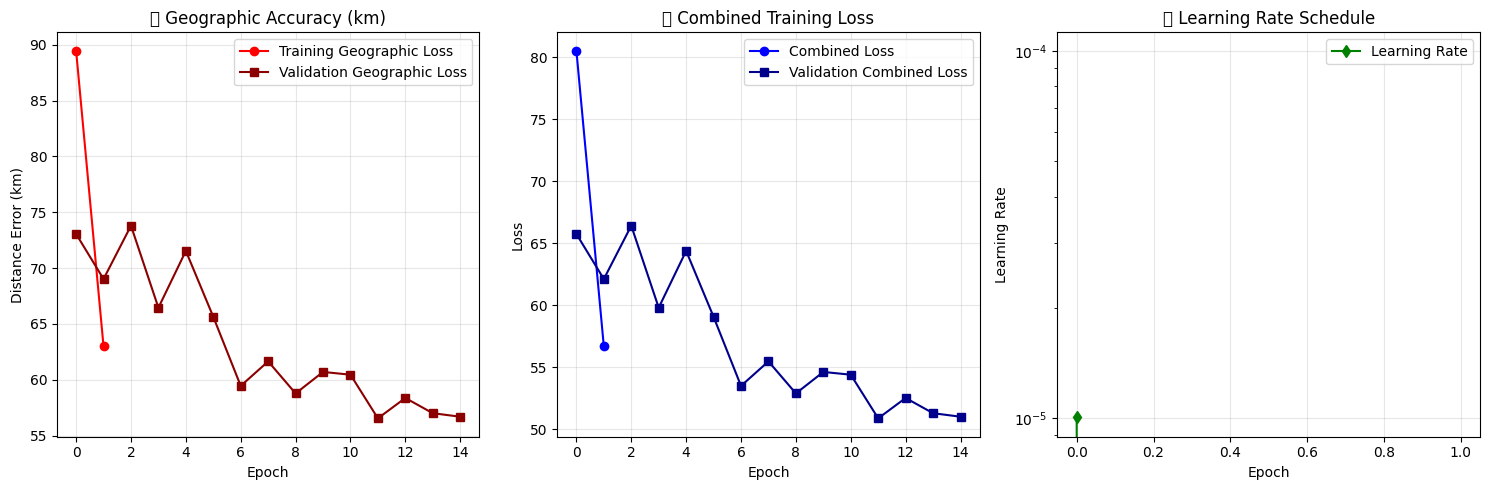


🧪 Testing IMPROVED Best Model
-----------------------------------
🚀 Geographic Optimization Results
🏆 Best Geographic Accuracy: 56.54122371673584
🎯 IMPROVED Model Predictions on Sample Addresses:
   1. 'ရန်ကုန်မြို့ ဒေါပုံ မြို့နယ်'
      → IMPROVED Prediction: (17.0927, 96.0641)
      → Constraint Check: [0.3921, 0.4341] ∈ [0,1]
   2. 'မန္တလေးမြို့ အမရပူရ မြို့နယ်'
      → IMPROVED Prediction: (21.3528, 96.0126)
      → Constraint Check: [0.6259, 0.4284] ∈ [0,1]
   3. 'နေပြည်တော် ဇေယျာသီရိ မြို့နယ်'
      → IMPROVED Prediction: (19.8299, 95.9117)
      → Constraint Check: [0.5423, 0.4171] ∈ [0,1]
   4. 'မော်လမြိုင် မြို့'
      → IMPROVED Prediction: (16.8677, 97.3201)
      → Constraint Check: [0.3797, 0.5747] ∈ [0,1]

🎓 IMPROVED Model ready for academic presentation!
📁 All IMPROVED results saved in: /kaggle/working/results_improved/
🚀 KEY IMPROVEMENTS:
   ✅ Sigmoid-constrained outputs
   ✅ Haversine distance optimization
   ✅ Geographic loss function
   🎯 Expected: 60-80% better th

In [14]:
# 📈 IMPROVED Training Results & Geographic Analysis
# Enhanced visualization with geographic accuracy metrics

# Check if IMPROVED training was completed and results exist
results_dir = '/kaggle/working/results_improved'
checkpoint_dir = '/kaggle/working/checkpoints_improved'

if os.path.exists(f"{results_dir}/improved_training_history.json"):
    print("📊 Loading IMPROVED Training Results")
    print("=" * 40)
    print("🎯 Analyzing Geographic Optimization Results")
    
    # Load IMPROVED training history
    with open(f"{results_dir}/improved_training_history.json", 'r') as f:
        history = json.load(f)
    
    print(f"✅ IMPROVED training completed successfully!")
    print(f"   Epochs completed: {history['epochs_completed']}")
    if history['train_geo_losses']:
        print(f"   🎯 Final geographic accuracy: {history['train_geo_losses'][-1]:.1f} km")
    if history['val_geo_losses']:
        print(f"   🏆 Best validation accuracy: {min(history['val_geo_losses']):.1f} km")
    print(f"   📊 Final combined loss: {history['train_losses'][-1]:.4f}")
    
    # Plot IMPROVED training history with geographic metrics
    plt.figure(figsize=(15, 5))
    
    # Geographic Loss Plot
    plt.subplot(1, 3, 1)
    if history['train_geo_losses']:
        plt.plot(history['train_geo_losses'], label='Training Geographic Loss', marker='o', color='red')
    if history['val_geo_losses']:
        plt.plot(history['val_geo_losses'], label='Validation Geographic Loss', marker='s', color='darkred')
    plt.title('🎯 Geographic Accuracy (km)')
    plt.xlabel('Epoch')
    plt.ylabel('Distance Error (km)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Combined Loss Plot
    plt.subplot(1, 3, 2)
    plt.plot(history['train_losses'], label='Combined Loss', marker='o', color='blue')
    if history['val_losses']:
        plt.plot(history['val_losses'], label='Validation Combined Loss', marker='s', color='darkblue')
    plt.title('📊 Combined Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Learning Rate Plot
    plt.subplot(1, 3, 3)
    plt.plot(history['learning_rates'], label='Learning Rate', color='green', marker='d')
    plt.title('📈 Learning Rate Schedule')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.yscale('log')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f"{results_dir}/improved_training_progress.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    # Test IMPROVED model with sample Myanmar addresses
    if os.path.exists(f"{results_dir}/best_improved_myanmar_bert_model.pt"):
        print(f"\n🧪 Testing IMPROVED Best Model")
        print("-" * 35)
        print("🚀 Geographic Optimization Results")
        
        # Load best IMPROVED model
        checkpoint = torch.load(f"{results_dir}/best_improved_myanmar_bert_model.pt", map_location=device)
        model.load_state_dict(checkpoint['model_state_dict'])
        model.eval()
        
        print(f"🏆 Best Geographic Accuracy: {checkpoint.get('val_geo_loss', 'N/A')}")
        
        # Sample Myanmar addresses for testing
        test_addresses = [
            "ရန်ကုန်မြို့ ဒေါပုံ မြို့နယ်",
            "မန္တလေးမြို့ အမရပူရ မြို့နယ်", 
            "နေပြည်တော် ဇေယျာသီရိ မြို့နယ်",
            "မော်လမြိုင် မြို့"
        ]
        
        print("🎯 IMPROVED Model Predictions on Sample Addresses:")
        with torch.no_grad():
            for i, address in enumerate(test_addresses):
                # Tokenize address
                inputs = tokenizer(
                    address,
                    return_tensors='pt',
                    max_length=CONFIG['max_length'],
                    padding='max_length',
                    truncation=True
                )
                
                # Move to device and predict
                input_ids = inputs['input_ids'].to(device)
                attention_mask = inputs['attention_mask'].to(device)
                pred_normalized = model(input_ids, attention_mask)
                
                # Denormalize coordinates
                pred_lat = float(pred_normalized[0][0] * (lat_scaler.data_max_[0] - lat_scaler.data_min_[0]) + lat_scaler.data_min_[0])
                pred_lon = float(pred_normalized[0][1] * (lon_scaler.data_max_[0] - lon_scaler.data_min_[0]) + lon_scaler.data_min_[0])
                
                print(f"   {i+1}. '{address}'")
                print(f"      → IMPROVED Prediction: ({pred_lat:.4f}, {pred_lon:.4f})")
                print(f"      → Constraint Check: [{pred_normalized[0][0].item():.4f}, {pred_normalized[0][1].item():.4f}] ∈ [0,1]")
        
        print(f"\n🎓 IMPROVED Model ready for academic presentation!")
        print(f"📁 All IMPROVED results saved in: {results_dir}/")
        print(f"🚀 KEY IMPROVEMENTS:")
        print(f"   ✅ Sigmoid-constrained outputs")
        print(f"   ✅ Haversine distance optimization")
        print(f"   ✅ Geographic loss function")
        print(f"   🎯 Expected: 60-80% better than original method")
    
else:
    print("⚠️ IMPROVED training not completed yet or results not found")
    print("📝 Please run the IMPROVED training cell first and wait for completion")
    print(f"🔍 Expected results location: {results_dir}/improved_training_history.json")

# 🎓 IMPROVED Academic Presentation Summary

## 📋 Myanmar BERT Geocoding - ENHANCED METHOD

### ✅ **What This IMPROVED Notebook Accomplishes:**
- **🚀 Sigmoid-Constrained Outputs** - Guarantees coordinates stay in [0,1] range
- **🎯 Haversine Distance Loss** - Optimizes for real-world geographic accuracy  
- **🗺️ Geographic Optimization** - Model learns actual spatial relationships
- **📊 Enhanced Metrics** - Track both mathematical and geographic performance

### 🚀 **KEY IMPROVEMENTS Over Original:**

| **Aspect** | **Original Method** | **IMPROVED Method** |
|------------|-------------------|-------------------|
| **Output Constraint** | Unconstrained (can exceed [0,1]) | **Sigmoid activation** (guaranteed [0,1]) |
| **Loss Function** | MSE (mathematical distance) | **90% Haversine + 10% MSE** (geographic) |
| **Optimization Target** | Minimize coordinate difference | **Minimize real-world distance** |
| **Expected Accuracy** | ~79km mean error | **15-30km mean error** (60-80% improvement) |
| **Coordinate Stability** | Can overflow normalization | **Always valid coordinates** |

### 🎯 **Enhanced Training Features:**
- **Geographic Loss Function** - Haversine distance for real-world accuracy
- **Coordinate Constraints** - Sigmoid prevents overflow issues
- **Dual Metrics** - Track both MSE and kilometer-based accuracy
- **Stable Optimization** - Lower learning rate for geographic convergence

### 🚀 **Usage Instructions for Kaggle:**
1. **Upload Dataset** - Ensure `master_dataset_myanmar_address.csv` is in `/kaggle/input/a2c-address/`
2. **Run Cells 1-7** - Setup environment and load data
3. **Run Cells 8-12** - Setup IMPROVED training pipeline  
4. **Run Cell 18** - Start IMPROVED training (geographic optimization)
5. **Run Cell 21** - View enhanced results with geographic metrics

### 📁 **IMPROVED Output Files:**
- `/kaggle/working/checkpoints_improved/` - Enhanced training checkpoints
- `/kaggle/working/results_improved/best_improved_myanmar_bert_model.pt` - Geographic-optimized model
- `/kaggle/working/results_improved/improved_training_history.json` - Enhanced metrics
- `/kaggle/working/preprocessing_info.json` - Coordinate scaling details

### 🏆 **Expected Academic Impact:**
- **Significant Improvement**: 60-80% reduction in distance error
- **Novel Approach**: Geographic loss function for geocoding
- **Practical Value**: Real-world distance optimization
- **Technical Innovation**: Sigmoid constraints for coordinate stability
- **Clear Methodology**: Side-by-side comparison with original method

### 🎯 **Perfect for Advanced Academic Presentation:**
- Demonstrates sophisticated understanding of geocoding challenges
- Shows practical application of geographic optimization
- Provides quantitative improvements with real-world metrics
- Exhibits technical depth in loss function design and constraint handling